## The challenge:

In this competition you’ll predict what types of trees there are in an area based on various geographic features.

The competition datasets comes from a study conducted in four wilderness areas within the beautiful Roosevelt National Forest of northern Colorado. These areas represent forests with very little human disturbances – the existing forest cover types there are more a result of ecological processes rather than forest management practices.

The data is in raw form and contains categorical data such as wilderness areas and soil type.

## Import Packages

In [1]:
DATA_DIR = '/kaggle/input/learn-together'
DATA_DIR = 'data'

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk(DATA_DIR):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data/train.csv
data/test.csv
data/sample_submission.csv
data/sample_submission.csv.zip
data/input
data/test.csv.zip
data/train.csv.zip


## Load Dataset

In [3]:
train_df=pd.read_csv(os.path.join(DATA_DIR, 'train.csv'))
test_df=pd.read_csv(os.path.join(DATA_DIR, 'test.csv'))

In [4]:
train_df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [5]:
test_df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print("shape training csv: %s" % str(train_df.shape)) 
print("shape test csv: %s" % str(test_df.shape)) 

shape training csv: (15120, 56)
shape test csv: (565892, 55)


### Feature types

In [7]:
print(train_df.dtypes.value_counts())
print(test_df.dtypes.value_counts())

int64    56
dtype: int64
int64    55
dtype: int64


In [8]:
train_df.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


## NaN
Let's see how many NaN we have in our datasets


In [9]:
train_df.isna().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [10]:
test_df.isna().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


### Percentage of Negative value in `Vertical_Distance_To_Hydrology`

In [11]:
print("percent of negative values (training): " + '%.3f' % ((train_df.loc[train_df['Vertical_Distance_To_Hydrology'] < 0].shape[0] / train_df.shape[0])*100))
print("percent of negative values (testing): " + '%.3f' % ((test_df.loc[test_df['Vertical_Distance_To_Hydrology'] < 0].shape[0]/ test_df.shape[0])*100))

percent of negative values (training): 7.533
percent of negative values (testing): 9.543


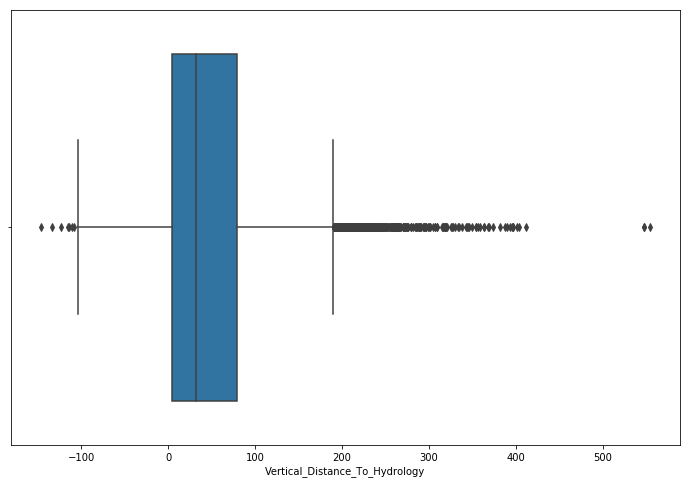

In [12]:
plt.figure(figsize=(12,8))
sns.boxplot(train_df['Vertical_Distance_To_Hydrology'])
plt.show()

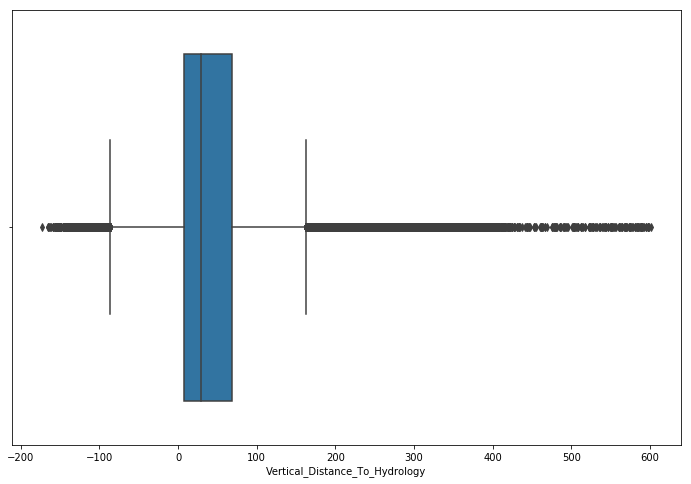

In [13]:
plt.figure(figsize=(12,8))
sns.boxplot(test_df['Vertical_Distance_To_Hydrology'])
plt.show()

## Delete Ids
**Let's delete the Id column in the training set but store it for the test set before deleting**

In [14]:
train_df = train_df.drop(["Id"], axis = 1)

test_ids = test_df["Id"]
test_df = test_df.drop(["Id"], axis = 1)

## Basic EDA

In [15]:
column_set = set(train_df.columns)
numerical = set([column for column in train_df.columns if 'Soil' not in column and 'Wilderness' not in column])
categorical = (column_set - numerical) | set(['Cover_Type'])


In [16]:
categorical_df = train_df[categorical] 
categorical_df.head()

,Soil_Type15,Soil_Type40,Cover_Type,Soil_Type10,Soil_Type32,Soil_Type29,Soil_Type19,Soil_Type26,Soil_Type17,Soil_Type33,...,Soil_Type7,Soil_Type20,Soil_Type13,Soil_Type27,Soil_Type36,Soil_Type18,Soil_Type22,Soil_Type9,Soil_Type1,Soil_Type11
0,0,0,5,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,5,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,5,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
numerical_df = train_df[numerical]
numerical_df.describe()

,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Vertical_Distance_To_Hydrology,Hillshade_Noon,Aspect,Elevation,Hillshade_9am,Slope
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,227.195701,1714.023214,135.091997,1511.147288,4.000000,51.076521,218.965608,156.676653,2749.322553,212.704299,16.501587
std,210.075296,1325.066358,45.895189,1099.936493,2.000066,61.239406,22.801966,110.085801,417.678187,30.561287,8.453927
min,0.000000,0.000000,0.000000,0.000000,1.000000,-146.000000,99.000000,0.000000,1863.000000,0.000000,0.000000
25%,67.000000,764.000000,106.000000,730.000000,2.000000,5.000000,207.000000,65.000000,2376.000000,196.000000,10.000000
50%,180.000000,1316.000000,138.000000,1256.000000,4.000000,32.000000,223.000000,126.000000,2752.000000,220.000000,15.000000
75%,330.000000,2270.000000,167.000000,1988.250000,6.000000,79.000000,235.000000,261.000000,3104.000000,235.000000,22.000000
max,1343.000000,6890.000000,248.000000,6993.000000,7.000000,554.000000,254.000000,360.000000,3849.000000,254.000000,52.000000


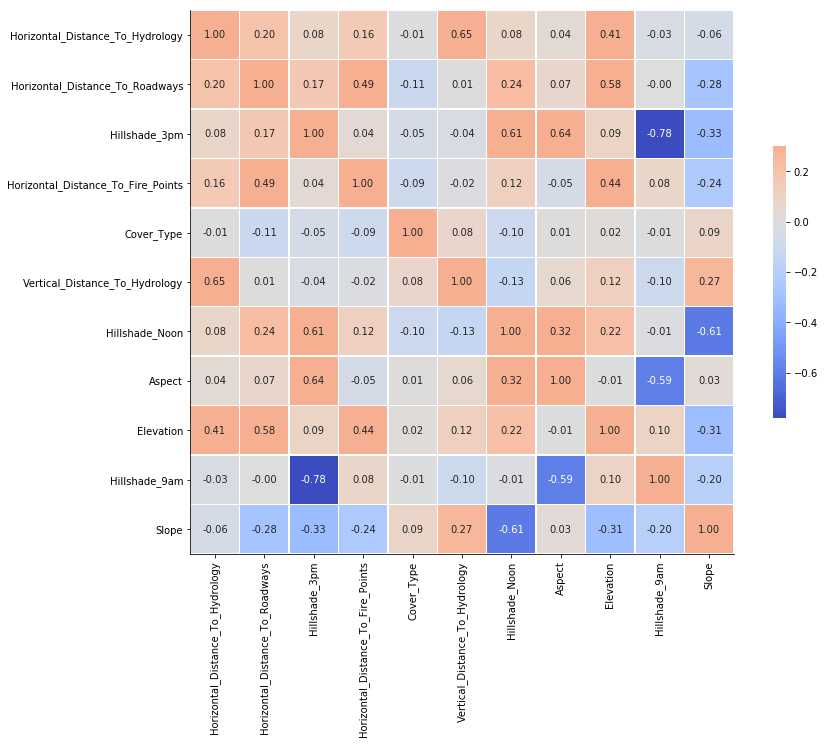

In [18]:
corr = numerical_df.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(14,10)
    
plt.show()

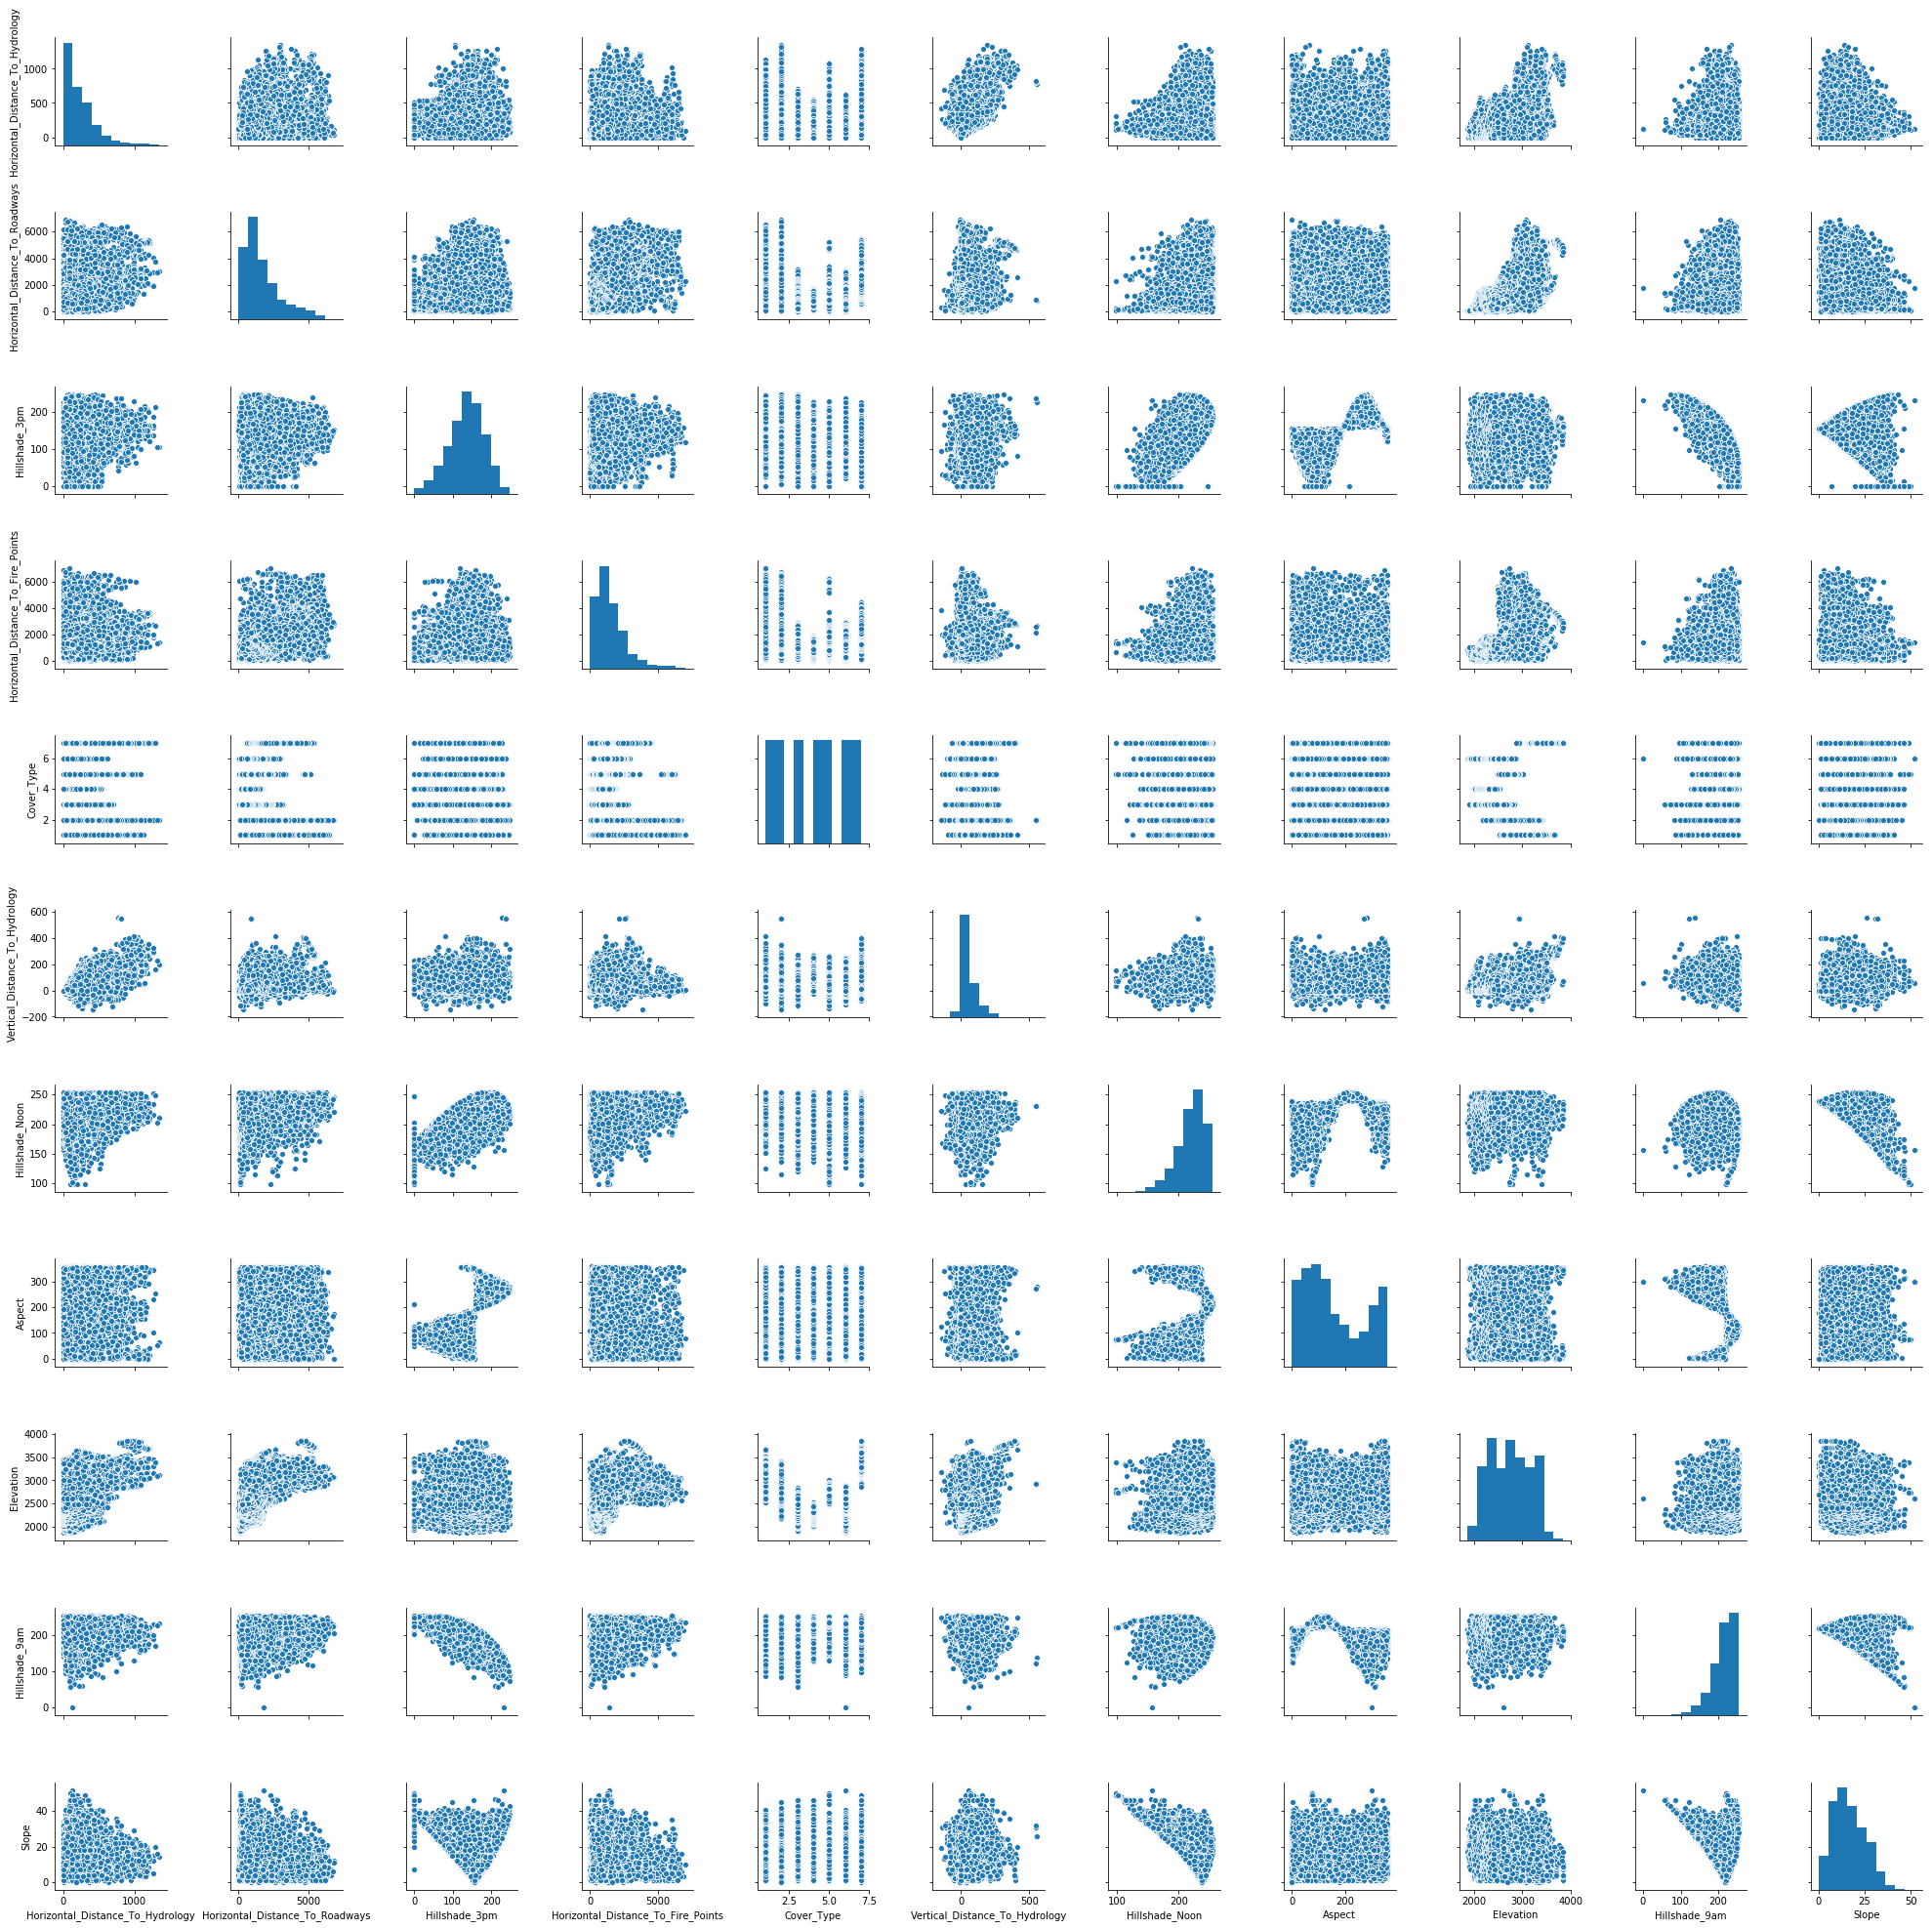

In [19]:
 sns.pairplot(numerical_df)

## Model Training

Let's use 80% of the Data for training, and 20% for validation. We'll then train a simple Random Forest Classifier with 100 trees


In [20]:
X_train, X_val, y_train, y_val = train_test_split(train_df.drop(['Cover_Type'], axis=1), train_df['Cover_Type'], test_size=0.2)

In [21]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((12096, 54), (3024, 54), (12096,), (3024,))

In [22]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
model.score(X_train, y_train)

1.0

In [24]:
predictions = model.predict(X_val)
accuracy_score(y_val, predictions)

0.8584656084656085

Our Model has a 100% accuracy on the training set and 86% on the test set. A clear example of overfitting. 

## Cross grid with all data

In [25]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

In [26]:
models = [AdaBoostClassifier(), GradientBoostingClassifier(), 
          RandomForestClassifier(), RidgeClassifier(),
          LogisticRegression(), DecisionTreeClassifier()]

In [27]:
for model in models:
    model.fit(X_train, y_train)
    print(model.__class__.__name__)
    print(model.score(X_train, y_train))
    predictions = model.predict(X_val)
    print(accuracy_score(y_val, predictions))
    print(f1_score(y_val, predictions, average='micro'))
    print(f1_score(y_val, predictions, average='weighted'))
    

AdaBoostClassifier
0.29621362433862436
0.2919973544973545
0.2919973544973545
0.23344518346236512
GradientBoostingClassifier
0.841765873015873
0.816468253968254
0.816468253968254
0.8115164651829344
RandomForestClassifier
0.9937996031746031
0.8316798941798942
0.8316798941798942
0.8284325711432728
RidgeClassifier
0.63682208994709
0.625
0.625
0.6187689163292716
LogisticRegression
0.6785714285714286
0.66005291005291
0.66005291005291
0.6519343718377398
DecisionTreeClassifier
1.0
0.781084656084656
0.781084656084656
0.7795002598300823


## Scale Data

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
new_df = numerical_df.drop(['Cover_Type'], axis=1)
scaled_features = scaler.fit_transform(new_df)

In [29]:
scaled_df = pd.concat([pd.DataFrame(scaled_features,
                          index=new_df.index, columns=new_df.columns),
                       numerical_df['Cover_Type']], axis=1)

In [30]:
scaled_df.head()

,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Vertical_Distance_To_Hydrology,Hillshade_Noon,Aspect,Elevation,Hillshade_9am,Slope,Cover_Type
0,0.146639,-0.908681,0.281259,4.334805,-0.834074,0.571653,-0.959980,-0.367095,0.271454,-1.597132,5
1,-0.072337,-0.999246,0.346627,4.285710,-0.932054,0.703225,-0.914559,-0.381461,0.238732,-1.715424,5
2,0.194243,1.106379,-0.002005,4.191156,0.227369,0.834797,-0.160577,0.130912,0.696843,-0.887379,2
3,0.070474,1.038455,-0.285268,4.272981,1.092853,0.834797,-0.015231,0.085421,0.827731,0.177250,2
4,-0.353198,-0.998491,0.324838,4.237524,-0.850404,0.659368,-1.014485,-0.369489,0.238732,-1.715424,5


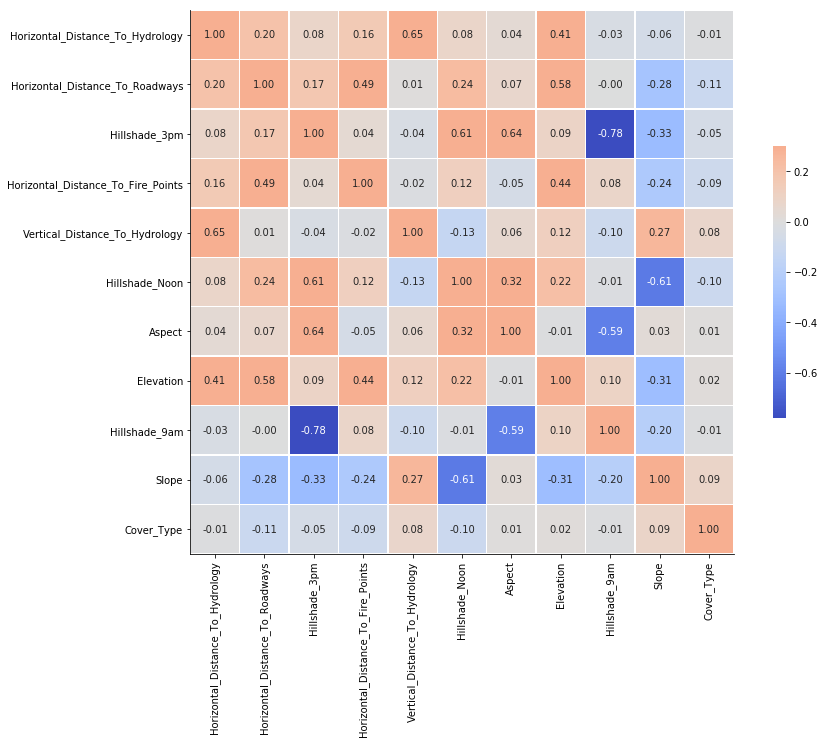

In [31]:
# For some sanity check
corr = scaled_df.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(14,10)
    
plt.show()

## Test linear relations

In [32]:
X = scaled_df.drop(['Cover_Type'], axis=1)
y = scaled_df['Cover_Type']


In [33]:
model = LogisticRegression()
model.fit(X, y)
model.score(X, y)

0.5882275132275132

In [34]:
model = RidgeClassifier()
model.fit(X, y)
model.score(X, y)

0.49074074074074076

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [36]:
pca.explained_variance_

array([2.8642448 , 2.28181004])

In [37]:
pca.explained_variance_ratio_

array([0.28640554, 0.22816591])

In [38]:
X_pca = pca.transform(X)

In [49]:
model = LogisticRegression()
model.fit(X_pca[:14000, :], y[:14000])
print(model.score(X_pca[:14000, :], y[:14000]))
print(model.score(X_pca[14000:, :], y[14000:]))

0.3477857142857143
0.3080357142857143


In [50]:
# Finally, are other types of prediction models strong with numerical features??
model = DecisionTreeClassifier()
model.fit(X_pca[:14000, :], y[:14000])
print(model.score(X_pca[:14000, :], y[:14000]))
print(model.score(X_pca[14000:, :], y[14000:]))

1.0
0.2544642857142857


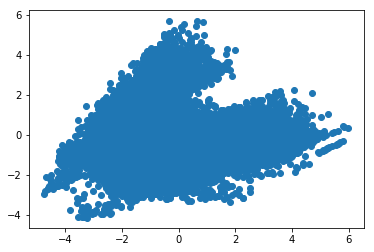

In [175]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])

Text(0.5, 1.0, 'PCA of Forest Types dataset')

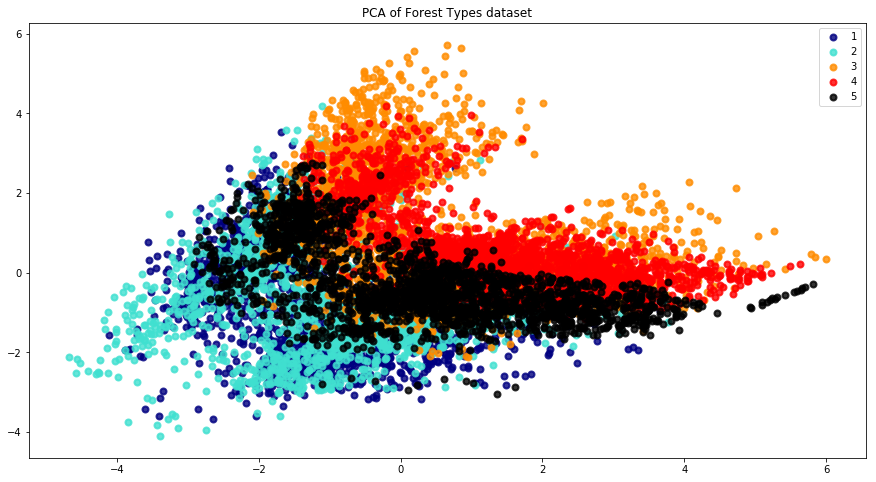

In [182]:
plt.figure(figsize=(15, 8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2

for i, color in zip(set(y), colors):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=lw,
                label=i)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Forest Types dataset')

### Linear relations are aparently very weak and some features have strong correlation, other are detached. Besides, the numerical features alone seem to be strong as predictors. Needs investigation.

## Predictions

In [29]:
test_pred = model.predict(test_df)

In [30]:
# Save test predictions to file
output = pd.DataFrame({'ID': test_ids,
                       'TARGET': test_pred})
output.to_csv('submission.csv', index=False)